In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-03-29 18:57:40.733761: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end,interval = '1h')
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-29 09:30:00-04:00,159.369995,160.300003,159.350006,159.806000,159.806000,12500844,APPLE
2023-03-29 10:30:00-04:00,159.804993,160.000000,159.350006,159.871902,159.871902,5313066,APPLE
2023-03-29 11:30:00-04:00,159.880005,160.059998,159.509995,159.929993,159.929993,4204303,APPLE
2023-03-29 12:30:00-04:00,159.921295,160.460007,159.800003,160.419998,160.419998,4571850,APPLE
2023-03-29 13:30:00-04:00,160.429993,160.440002,159.899994,160.195007,160.195007,3991973,APPLE
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-29 09:30:00-04:00,159.369995,160.300003,159.350006,159.806000,159.806000,12500844,APPLE
1,2023-03-29 10:30:00-04:00,159.804993,160.000000,159.350006,159.871902,159.871902,5313066,APPLE
2,2023-03-29 11:30:00-04:00,159.880005,160.059998,159.509995,159.929993,159.929993,4204303,APPLE
3,2023-03-29 12:30:00-04:00,159.921295,160.460007,159.800003,160.419998,160.419998,4571850,APPLE
4,2023-03-29 13:30:00-04:00,160.429993,160.440002,159.899994,160.195007,160.195007,3991973,APPLE
...,...,...,...,...,...,...,...,...
17555,2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
17556,2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
17557,2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC
17558,2024-03-28 14:30:00-04:00,174.970001,176.100006,174.684998,175.960007,175.960007,703426,GENERAL_ELC


In [11]:
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-29 09:30:00-04:00,159.369995,160.300003,159.350006,159.806000,159.806000,12500844,APPLE
2023-03-29 10:30:00-04:00,159.804993,160.000000,159.350006,159.871902,159.871902,5313066,APPLE
2023-03-29 11:30:00-04:00,159.880005,160.059998,159.509995,159.929993,159.929993,4204303,APPLE
2023-03-29 12:30:00-04:00,159.921295,160.460007,159.800003,160.419998,160.419998,4571850,APPLE
2023-03-29 13:30:00-04:00,160.429993,160.440002,159.899994,160.195007,160.195007,3991973,APPLE
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2023-03-29 09:30:00-04:00,159.806000
2023-03-29 10:30:00-04:00,159.871902
2023-03-29 11:30:00-04:00,159.929993
2023-03-29 12:30:00-04:00,160.419998
2023-03-29 13:30:00-04:00,160.195007
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

15014

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.53435272],
       [-0.53413922],
       [-0.53395103],
       ...,
       [-0.48524362],
       [-0.48202019],
       [-0.48341324]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape[1]

60

In [21]:
y_train.shape[0]

14954

In [22]:
x_train.shape

(14954, 60, 1)

In [23]:
x_train

array([[[-0.53435272],
        [-0.53413922],
        [-0.53395103],
        ...,
        [-0.53077654],
        [-0.5300962 ],
        [-0.5291509 ]],

       [[-0.53413922],
        [-0.53395103],
        [-0.53236361],
        ...,
        [-0.5300962 ],
        [-0.5291509 ],
        [-0.52818228]],

       [[-0.53395103],
        [-0.53236361],
        [-0.53309249],
        ...,
        [-0.5291509 ],
        [-0.52818228],
        [-0.52941556]],

       ...,

       [[-0.70500195],
        [-0.70331734],
        [-0.7028638 ],
        ...,
        [-0.69781003],
        [-0.69771285],
        [-0.69424647]],

       [[-0.70331734],
        [-0.7028638 ],
        [-0.70322016],
        ...,
        [-0.69771285],
        [-0.69424647],
        [-0.69382531]],

       [[-0.7028638 ],
        [-0.70322016],
        [-0.70072568],
        ...,
        [-0.69424647],
        [-0.69382531],
        [-0.69547751]]])

In [24]:
com='META'
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-29 09:30:00-04:00,203.559998,203.990005,202.535507,202.929993,202.929993,4194388,META
2023-03-29 10:30:00-04:00,202.949997,203.699997,202.660004,203.619995,203.619995,1904599,META
2023-03-29 11:30:00-04:00,203.600098,204.949997,203.600006,204.710007,204.710007,2110393,META
2023-03-29 12:30:00-04:00,204.729996,205.279999,204.199997,205.200195,205.200195,1966770,META
2023-03-29 13:30:00-04:00,205.224792,205.259995,204.550003,204.774994,204.774994,1761537,META
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,488.965088,489.179993,485.150085,486.331390,486.331390,1622069,META
2024-03-28 12:30:00-04:00,486.279999,486.929993,485.359985,486.799988,486.799988,1221857,META
2024-03-28 13:30:00-04:00,486.808014,488.869995,486.250000,487.589996,487.589996,1229565,META


In [25]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [26]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [27]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [28]:
from keras.layers import Input, Dense
from keras.models import Model

In [29]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [30]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

150/150 [==============================] - 0s 661us/step - loss: 0.3612


In [32]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [33]:
dataset

,Close
Datetime,
2023-03-29 09:30:00-04:00,159.806000
2023-03-29 10:30:00-04:00,159.871902
2023-03-29 11:30:00-04:00,159.929993
2023-03-29 12:30:00-04:00,160.419998
2023-03-29 13:30:00-04:00,160.195007
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [34]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2023-10-16 13:30:00-04:00,108.080002
2023-10-16 14:30:00-04:00,109.012802
2023-10-16 15:30:00-04:00,109.099998
2023-10-17 09:30:00-04:00,109.242897
2023-10-17 10:30:00-04:00,109.690102
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [35]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [109]:
x_test

array([[-0.70322016, -0.70072568, -0.69871711, ..., -0.69382531,
        -0.69547751, -0.69755086],
       [-0.70072568, -0.69871711, -0.70053128, ..., -0.69547751,
        -0.69755086, -0.70192431],
       [-0.69871711, -0.70053128, -0.70202377, ..., -0.69755086,
        -0.70192431, -0.69890241],
       ...,
       [-0.50045352, -0.50103668, -0.50168459, ..., -0.48323504,
        -0.48242514, -0.48642605],
       [-0.50103668, -0.50168459, -0.50021768, ..., -0.48242514,
        -0.48642605, -0.48524362],
       [-0.50168459, -0.50021768, -0.50027537, ..., -0.48642605,
        -0.48524362, -0.48202019]])

In [36]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

25/25 [==============================] - 0s 598us/step


array([[7.61071278e-05],
       [7.59718241e-05],
       [7.60607654e-05],
       [7.62058189e-05],
       [7.65704826e-05],
       [7.66756930e-05],
       [7.68208993e-05],
       [7.66680168e-05],
       [7.66879821e-05],
       [7.66563899e-05],
       [7.67568927e-05],
       [7.64699944e-05],
       [7.67147503e-05],
       [7.68862665e-05],
       [7.71536143e-05],
       [7.71315390e-05],
       [7.74008513e-05],
       [7.72836502e-05],
       [7.68751270e-05],
       [7.66039957e-05],
       [7.62395430e-05],
       [7.60937764e-05],
       [7.60110925e-05],
       [7.58847818e-05],
       [7.56005029e-05],
       [7.55392393e-05],
       [7.54488938e-05],
       [7.53455752e-05],
       [7.51412954e-05],
       [7.50014151e-05],
       [7.45755679e-05],
       [7.42092307e-05],
       [7.41544063e-05],
       [7.36623260e-05],
       [7.34025234e-05],
       [7.31051623e-05],
       [7.25667269e-05],
       [7.22934928e-05],
       [7.22954137e-05],
       [7.26211365e-05],


In [37]:
len(predictions)

790

In [38]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [39]:
predictions = scaler.inverse_transform(predictions)

In [40]:
mse = np.mean(predictions -f_app)
mse

115.11591022607605

In [41]:
predictions

array([[324.7735 ],
       [324.77344],
       [324.77347],
       [324.7735 ],
       [324.77362],
       [324.77365],
       [324.7737 ],
       [324.77365],
       [324.77365],
       [324.77365],
       [324.77368],
       [324.77362],
       [324.77368],
       [324.7737 ],
       [324.7738 ],
       [324.7738 ],
       [324.77386],
       [324.77383],
       [324.7737 ],
       [324.77365],
       [324.77353],
       [324.77347],
       [324.77347],
       [324.77344],
       [324.77332],
       [324.77332],
       [324.7733 ],
       [324.77325],
       [324.77316],
       [324.77313],
       [324.773  ],
       [324.77292],
       [324.7729 ],
       [324.77274],
       [324.77264],
       [324.77255],
       [324.7724 ],
       [324.77234],
       [324.77234],
       [324.7724 ],
       [324.77228],
       [324.77237],
       [324.77225],
       [324.77225],
       [324.7722 ],
       [324.77222],
       [324.77234],
       [324.77252],
       [324.77237],
       [324.77243],


In [42]:
    import random
    random.random()

0.3149079406173584

In [43]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [44]:
    Final_pred

array([[164.01878],
       [164.01872],
       [164.01875],
       [164.01878],
       [164.0189 ],
       [164.01894],
       [164.019  ],
       [164.01894],
       [164.01894],
       [164.01894],
       [164.01897],
       [164.0189 ],
       [164.01897],
       [164.019  ],
       [164.01909],
       [164.01909],
       [164.01915],
       [164.01912],
       [164.019  ],
       [164.01894],
       [164.01881],
       [164.01875],
       [164.01875],
       [164.01872],
       [164.0186 ],
       [164.0186 ],
       [164.01857],
       [164.01854],
       [164.01845],
       [164.01842],
       [164.0183 ],
       [164.0182 ],
       [164.01817],
       [164.01802],
       [164.01793],
       [164.01784],
       [164.01768],
       [164.01762],
       [164.01762],
       [164.01768],
       [164.01756],
       [164.01765],
       [164.01753],
       [164.01753],
       [164.01747],
       [164.0175 ],
       [164.01762],
       [164.0178 ],
       [164.01765],
       [164.01772],


In [45]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

1756

In [46]:
    len(data[138:252])

114

In [47]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [48]:
    valid

,Close_app,Predictions
0,202.929993,164.018784
1,203.619995,164.018723
2,204.710007,164.018753
3,205.200195,164.018784
4,204.774994,164.018906
...,...,...
785,298.088989,164.343155
786,297.880005,164.343735
787,305.200012,164.347061
788,305.174988,164.349045


In [49]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-29 09:30:00-04:00,159.369995,160.300003,159.350006,159.806000,159.806000,12500844,APPLE
1,2023-03-29 10:30:00-04:00,159.804993,160.000000,159.350006,159.871902,159.871902,5313066,APPLE
2,2023-03-29 11:30:00-04:00,159.880005,160.059998,159.509995,159.929993,159.929993,4204303,APPLE
3,2023-03-29 12:30:00-04:00,159.921295,160.460007,159.800003,160.419998,160.419998,4571850,APPLE
4,2023-03-29 13:30:00-04:00,160.429993,160.440002,159.899994,160.195007,160.195007,3991973,APPLE
...,...,...,...,...,...,...,...,...
17555,2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
17556,2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
17557,2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC
17558,2024-03-28 14:30:00-04:00,174.970001,176.100006,174.684998,175.960007,175.960007,703426,GENERAL_ELC


In [50]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2023-03-29 09:30:00-04:00,159.806000
1,2023-03-29 10:30:00-04:00,159.871902
2,2023-03-29 11:30:00-04:00,159.929993
3,2023-03-29 12:30:00-04:00,160.419998
4,2023-03-29 13:30:00-04:00,160.195007
...,...,...
17555,2024-03-28 11:30:00-04:00,175.835007
17556,2024-03-28 12:30:00-04:00,174.600006
17557,2024-03-28 13:30:00-04:00,174.964996
17558,2024-03-28 14:30:00-04:00,175.960007


In [51]:
    dfxf['Datetime']

0        2023-03-29 09:30:00-04:00
1        2023-03-29 10:30:00-04:00
2        2023-03-29 11:30:00-04:00
3        2023-03-29 12:30:00-04:00
4        2023-03-29 13:30:00-04:00
                   ...            
17555    2024-03-28 11:30:00-04:00
17556    2024-03-28 12:30:00-04:00
17557    2024-03-28 13:30:00-04:00
17558    2024-03-28 14:30:00-04:00
17559    2024-03-28 15:30:00-04:00
Name: Datetime, Length: 17560, dtype: object

In [52]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [53]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2023-03-29 09:30:00-04:00,159.806000
2023-03-29 10:30:00-04:00,159.871902
2023-03-29 11:30:00-04:00,159.929993
2023-03-29 12:30:00-04:00,160.419998
2023-03-29 13:30:00-04:00,160.195007
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [54]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

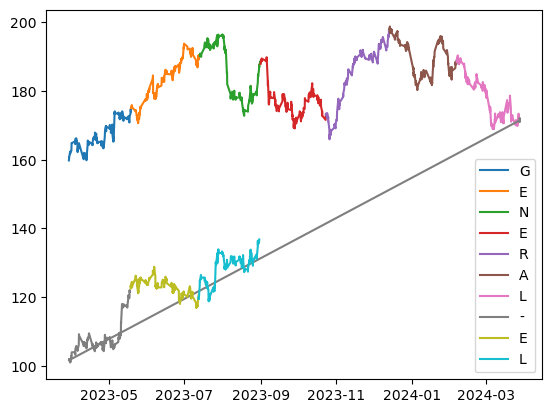

In [55]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [56]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-29 09:30:00-04:00,203.559998,203.990005,202.535507,202.929993,202.929993,4194388,META
2023-03-29 10:30:00-04:00,202.949997,203.699997,202.660004,203.619995,203.619995,1904599,META
2023-03-29 11:30:00-04:00,203.600098,204.949997,203.600006,204.710007,204.710007,2110393,META
2023-03-29 12:30:00-04:00,204.729996,205.279999,204.199997,205.200195,205.200195,1966770,META
2023-03-29 13:30:00-04:00,205.224792,205.259995,204.550003,204.774994,204.774994,1761537,META
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,488.965088,489.179993,485.150085,486.331390,486.331390,1622069,META
2024-03-28 12:30:00-04:00,486.279999,486.929993,485.359985,486.799988,486.799988,1221857,META
2024-03-28 13:30:00-04:00,486.808014,488.869995,486.250000,487.589996,487.589996,1229565,META


In [57]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [58]:
    df_app_c

,Close
Datetime,
2023-03-29 09:30:00-04:00,202.929993
2023-03-29 10:30:00-04:00,203.619995
2023-03-29 11:30:00-04:00,204.710007
2023-03-29 12:30:00-04:00,205.200195
2023-03-29 13:30:00-04:00,204.774994
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [59]:
    dfxfs

,Close
Datetime,
2023-03-29 09:30:00-04:00,159.806000
2023-03-29 10:30:00-04:00,159.871902
2023-03-29 11:30:00-04:00,159.929993
2023-03-29 12:30:00-04:00,160.419998
2023-03-29 13:30:00-04:00,160.195007
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [60]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2023-03-29 09:30:00-04:00,202.929993
2023-03-29 10:30:00-04:00,203.619995
2023-03-29 11:30:00-04:00,204.710007
2023-03-29 12:30:00-04:00,205.200195
2023-03-29 13:30:00-04:00,204.774994
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [61]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2023-03-29 09:30:00-04:00,202.929993
2023-03-29 10:30:00-04:00,203.619995
2023-03-29 11:30:00-04:00,204.710007
2023-03-29 12:30:00-04:00,205.200195
2023-03-29 13:30:00-04:00,204.774994
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [62]:
    dfxfs

,Close
Datetime,
2023-03-29 09:30:00-04:00,159.806000
2023-03-29 10:30:00-04:00,159.871902
2023-03-29 11:30:00-04:00,159.929993
2023-03-29 12:30:00-04:00,160.419998
2023-03-29 13:30:00-04:00,160.195007
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [63]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([202.92999268, 203.61999512, 204.71000671, ..., 487.58999634,
       488.88500977, 485.57998657])

In [64]:
    fcv = np.array(dfxfs['Close'])

In [65]:
    len(fcv)

17560

In [66]:
    mseallfe = np.zeros(len(dfxfs))

In [67]:
    dfxfs[1:4]

,Close
Datetime,
2023-03-29 10:30:00-04:00,159.871902
2023-03-29 11:30:00-04:00,159.929993
2023-03-29 12:30:00-04:00,160.419998


In [68]:
    for i in range(0,len(dfxfs)):
        mseallfe[i] = fcv[i]-fxv[i]
        

In [69]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

17560

In [70]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

17560

In [71]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [72]:
    len(final_df)

17560

In [73]:
    len(mseallfe)

17560

In [74]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([202.92999268, 203.61999512, 204.71000671, ..., 487.58999634,
       488.88500977, 485.57998657])

In [75]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,202.929993
1,203.619995
2,204.710007
3,205.200195
4,204.774994
...,...
17555,486.331390
17556,486.799988
17557,487.589996
17558,488.885010


In [76]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [77]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

13262

In [78]:
    datasetx

,Close
1746,492.630005
1747,492.390015
1748,494.000000
1749,489.549988
1750,488.950012
...,...
15700,510.709991
15701,507.980011
15702,502.269989
15703,503.847900


In [79]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[0.03514202],
       [0.0342845 ],
       [0.04003722],
       ...,
       [0.06958715],
       [0.07522526],
       [0.07555436]])

In [80]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([ 0.03514202,  0.0342845 ,  0.04003722,  0.02413666,  0.02199285,
        0.01263612,  0.01431049,  0.01713331,  0.02176059,  0.00995124,
       -1.        , -0.99753452, -0.99363974, -0.99188822, -0.99340753,
       -0.99162701, -0.99131721, -0.98484982, -0.98615404, -0.98220708,
       -0.98317043, -0.98570772, -0.98345629, -0.98234862, -0.97620242,
       -0.97505936, -0.97491717, -0.97598842, -0.97484498, -0.9706644 ,
       -0.9676272 , -0.97180778, -0.9729673 , -0.97019988, -0.97323708,
       -0.97039643, -0.96408982, -0.96391115, -0.95672913, -0.95755094,
       -0.96330372, -0.96146355, -0.96251762, -0.960338  , -0.95787251,
       -0.96364961, -0.97036066, -0.97184355, -0.97130754, -0.97046861,
       -0.97241527, -0.96937807, -0.97287974, -0.96905753, -0.96118162,
       -0.95722937, -0.95029745, -0.95201255, -0.95290584, -0.9706644 ])]
[-0.9656620122356013]

[array([ 0.03514202,  0.0342845 ,  0.04003722,  0.02413666,  0.02199285,
        0.01263612,  0.01431049,  0.0

In [81]:
    len(x_trainx)

13202

In [82]:
    sdx

,Close
0,202.929993
1,203.619995
2,204.710007
3,205.200195
4,204.774994
...,...
17555,486.331390
17556,486.799988
17557,487.589996
17558,488.885010


In [83]:
    x_trainx.shape[0]

13202

In [84]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [85]:
    xtrainfinal.shape[0]

17560

In [86]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [87]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [88]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [89]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

133/133 [==============================] - 0s 665us/step - loss: 0.3211


In [90]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [91]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
15008,314.714996
15009,314.690002
15010,319.611603
15011,319.879608
15012,320.109985
...,...
15700,510.709991
15701,507.980011
15702,502.269989
15703,503.847900


In [92]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [93]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

22/22 [==============================] - 0s 588us/step


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [94]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [95]:
    predictionsx

array([[482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],
       [482.79498],


In [96]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

17560

In [97]:
    data

0        202.929993
1        203.619995
2        204.710007
3        205.200195
4        204.774994
            ...    
17555    486.331390
17556    486.799988
17557    487.589996
17558    488.885010
17559    485.579987
Name: Close, Length: 17560, dtype: float64

In [98]:
    datax = pd.DataFrame(data)
    datax

,Close
0,202.929993
1,203.619995
2,204.710007
3,205.200195
4,204.774994
...,...
17555,486.331390
17556,486.799988
17557,487.589996
17558,488.885010


In [99]:
    datax

,Close
0,202.929993
1,203.619995
2,204.710007
3,205.200195
4,204.774994
...,...
17555,486.331390
17556,486.799988
17557,487.589996
17558,488.885010


In [100]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[202.92999268 203.61999512 204.71000671 205.20019531 204.7749939
 205.27330017 205.36000061 207.16999817 206.80499268 207.90960693
 207.63999939 206.92990112 207.55999756 207.86999512 209.59010315
 209.91000366 209.94979858 209.6499939  209.97000122 211.13999939
 211.99000549 210.82000732 210.49549866 211.27000427 210.41999817
 211.21499634 212.97999573 213.02999878 215.03999329 214.80999756
 213.19999695 213.71499634 213.41999817 214.02999878 214.72000122
 213.10319519 211.2250061  210.80999756 210.96000671 211.1947937
 210.6499939  211.5        210.52000427 211.58970642 213.79389954
 214.8999939  216.83999634 216.36000061 216.11000061 211.13999939
 212.53999329 212.85499573 214.21980286 214.98039246 214.58000183
 214.75       215.67999268 214.7250061  214.38000488 214.41000366
 215.14660645 214.82000732 213.83999634 215.27999878 213.86990356
 215.80000305 216.48500061 215.56059265 214.16999817 214.08000183
 218.72999573 218.1499939  218.61999512 219.19999695 220.08999634
 220.0167999

In [101]:
    valid = pd.DataFrame()

In [102]:
    valid

""


In [103]:
    np.array(data)

array([202.92999268, 203.61999512, 204.71000671, ..., 487.58999634,
       488.88500977, 485.57998657])

In [104]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [105]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [106]:
    valid

,predictions,close app
0,206.776703,202.929993
1,207.397705,203.619995
2,208.378723,204.710007
3,208.819885,205.200195
4,208.437195,204.774994
...,...,...
692,285.456085,289.084991
693,286.230194,289.660004
694,286.383087,289.750000
695,286.311676,289.859985


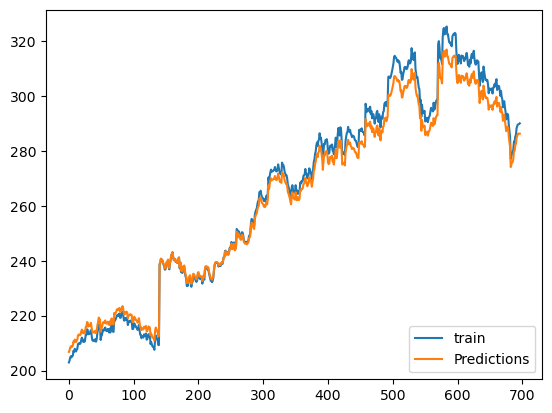

[[1.96130319 1.77671263 1.43760084 ... 9.10896795 9.11500315 9.12823011]
 [2.11369638 1.94363319 1.63942013 ... 9.07481652 9.08087442 9.09415102]
 [2.33425159 2.1814509  1.91538937 ... 9.02060291 9.02669719 9.04005336]
 ...
 [9.13526652 9.09742227 9.037316   ... 1.83491494 1.86464425 1.92826364]
 [9.13135715 9.09349663 9.03336423 ... 1.85427182 1.88369566 1.94669253]
 [9.13205561 9.094198   9.03407027 ... 1.8508289  1.88030662 1.94341336]]


In [107]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [108]:
final_pred

array([206.77670288, 207.39770508, 208.37872314, 208.81988525,
       208.43719482, 208.88568115, 208.9637146 , 210.5927124 ,
       210.26422119, 211.25836182, 211.01571655, 210.37661743,
       210.94372559, 211.22271729, 212.77081299, 213.05871582,
       213.09454346, 212.82470703, 213.11273193, 214.16571045,
       214.9307251 , 213.87771606, 213.58566284, 214.28271484,
       213.5177002 , 214.23321533, 215.82171631, 215.86669922,
       217.67572021, 217.46868896, 216.01971436, 216.48321533,
       216.2177124 , 216.76672363, 217.38769531, 215.93258667,
       214.24221802, 213.86871338, 214.00372314, 214.21502686,
       213.72470093, 214.48971558, 213.60772705, 214.57043457,
       216.55419922, 217.54968262, 219.29571533, 218.8637085 ,
       218.63870239, 214.16571045, 215.42572021, 215.709198  ,
       216.93753052, 217.62207031, 217.26171875, 217.41470337,
       218.25170898, 217.39221191, 217.08172607, 217.10870361,
       217.77166748, 217.47772217, 216.59570312, 217.89